In [1]:
# Imports
import os 
import pandas as pd
import numpy as np
import re
import altair as alt 

In [2]:
# Altair related settings
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [3]:
# Set Paths
PATH_parsed = './parsed/'
PATH_annotated = './annotated/'
PATH_processed = './processed/'


In [4]:
def convert_str_to_list(s):
    """Converts string representation of list into list"""
    return s.strip('[]').split(", ")

def convert_str_to_list_author(s):
    """Converts string representation of list into list, for authors"""
    return re.findall(r'\{[^\}]*\}', s.strip('[]'))

def convert_hash_to_dict(s):
    """Converts string representatiton of Ruby hash to Python dict"""
    items = s.strip("{}").split(", ")
    items = [i.strip("\'").strip("{}").split("=>") for i in items]
    
    d = {}

    for i in items:
        if i[0].startswith(":"):
            d[i[0][1:]] = i[1].strip("\"\'")

    return d

In [5]:
print("STATS FOR ANNOTATED")
stats_annotated = {}
pre_filter_annotations = {}
for folder in os.listdir(PATH_annotated):
    if os.path.isdir(PATH_annotated + folder):
        print(f"Parsing files in {folder}...")
        annotator_df = pd.DataFrame()
        course_count = 0
        annotation_count = 0
        empty_courses = 0
        for file in os.listdir(PATH_annotated + folder):
            if file != '.DS_Store':
                fn = PATH_annotated + folder + '/' + file
                course_count += 1
                with open(fn, 'r') as f:
                    size = len(f.readlines())
                    annotation_count += size
                    if size > 0:
                        incoming_df = pd.read_csv(PATH_annotated + folder + '/' + file, delimiter='\t', header=None)
                        incoming_df = incoming_df.fillna("")
                        incoming_df.columns = ["category", "reading"]
                        incoming_df["course"] = file.split(".")[0]
                        annotator_df = pd.concat([annotator_df, incoming_df], ignore_index=True)
                    else:
                        empty_courses += 1
        print(f"{annotation_count} annotations over {course_count} courses")
        print()
        stats_annotated[folder] = {'annotations': annotation_count, 'courses': course_count}
        pre_filter_annotations[folder] = annotator_df.drop_duplicates(ignore_index=True)


print("COMPLETE!!")

STATS FOR ANNOTATED
Parsing files in jessie...
4369 annotations over 108 courses

Parsing files in jinhong...
1355 annotations over 133 courses

Parsing files in jae...
5647 annotations over 102 courses

Parsing files in min...
1924 annotations over 180 courses

Parsing files in biya...
5229 annotations over 105 courses

COMPLETE!!


In [21]:
pre_filter_annotations['jae'].to_csv('pre_filter_annotations_by_' + 'jae' + '.tsv', sep='\t', index=False)
pre_filter_annotations['biya'].to_csv('pre_filter_annotations_by_' + 'biya' + '.tsv', sep='\t', index=False)

pre_filter_annotations['jinhong'].to_csv('pre_filter_annotations_by_' + 'jinhong' + '.tsv', sep='\t', index=False)
pre_filter_annotations['min'].to_csv('pre_filter_annotations_by_' + 'min' + '.tsv', sep='\t', index=False)

In [7]:
print("STATS FOR PROCESSED")
stats_processed = {}
for folder in os.listdir(PATH_processed):
    if os.path.isdir(PATH_processed + folder):
        print(f"Parsing files in {folder}...")
        course_count = 0
        annotation_count = 0
        empty_courses = 0
        for file in os.listdir(PATH_processed + folder):
            if file != '.DS_Store':
                fn = PATH_processed + folder + '/' + file
                course_count += 1
                with open(fn, 'r') as f:
                    size = len(f.readlines())
                    annotation_count += size
        print(f"{annotation_count} annotations over {course_count} courses")
        print()
        stats_processed[folder] = {'annotations': annotation_count, 'courses': course_count}

print("COMPLETE!!")

STATS FOR PROCESSED
Parsing files in jessie...
4095 annotations over 108 courses

Parsing files in jinhong...
1313 annotations over 133 courses

Parsing files in jae...
5255 annotations over 102 courses

Parsing files in min...
1869 annotations over 180 courses

Parsing files in biya...
5116 annotations over 105 courses

COMPLETE!!


In [8]:
annotations = {}

print("STATS FOR PARSED")
stats_parsed = {}

for folder in os.listdir(PATH_parsed):
    if os.path.isdir(PATH_parsed + folder):
        print(f"Parsing files in {folder}...")
        annotator_df = pd.DataFrame()
        course_count = 0
        annotation_count = 0
        empty_courses = 0
        for file in os.listdir(PATH_parsed + folder):
            if file != '.DS_Store':
                fn = PATH_parsed + folder + '/' + file
                course_count += 1
                with open(fn, 'r') as f:
                    size = len(f.readlines())
                    annotation_count += size
                    if size > 0:
                        incoming_df = pd.read_csv(PATH_parsed + folder + '/' + file, delimiter='\t', header=None)
                        incoming_df = incoming_df.fillna("")
                        incoming_df.columns = ["category", "author", "title", "type", "collection", "year"]
                        incoming_df["course"] = file.split(".")[0]
                        #incoming_df["author"] = incoming_df["author"].apply(convert_str_to_list_author)
                        incoming_df[["title", "type", "collection", "year"]] = incoming_df[["title", "type", "collection", "year"]].applymap(convert_str_to_list)
                        incoming_df[["title", "type", "collection", "year"]] = incoming_df[["title", "type", "collection", "year"]].applymap(lambda x: x[0])
                        incoming_df[["title", "type", "collection", "year"]] = incoming_df[["title", "type", "collection", "year"]].applymap(lambda x: x.strip("\""))

                        annotator_df = pd.concat([annotator_df, incoming_df], ignore_index=True)
                    else:
                        empty_courses += 1
        print(f"{annotation_count} annotations over {course_count} courses")
        print()
        annotations[folder] = annotator_df.drop_duplicates(ignore_index=True)
        stats_parsed[folder] = {'annotations': annotation_count, 'courses': course_count}


print("COMPLETE!!")

STATS FOR PARSED
Parsing files in jessie...
3295 annotations over 96 courses

Parsing files in jinhong...
1206 annotations over 131 courses

Parsing files in jae...
3078 annotations over 86 courses

Parsing files in min...
1722 annotations over 177 courses

Parsing files in biya...
3125 annotations over 90 courses

COMPLETE!!


In [9]:
# Preview a dataframe, for annotator == jae
annotations['jae']

,category,author,title,type,collection,year,course
0,Required,"[{:family=>""Grassberger"", :given=>""P.""}, {:fam...",Characterization of Strange Attractors,article-journal,Physical Review Letters,1983,1022
1,Required,"[{:family=>""Sauer"", :given=>""T.""}, {:family=>""...",Embedology,article-journal,Journal of Statistical Physics,1991,1022
2,Required,"[{:family=>""Ziehmann"", :given=>""C.""}, {:family...",Localized Lyapunov Exponents and the Predictio...,article-journal,Physics Letters A,2000,1022
3,Required,"[{:family=>""Smith"", :given=>""L.A.""}, {:family=...",Uncertainty Dynamics and Predictability in Cha...,article-journal,Quarterly Journal of the Royal Meteorological ...,1999,1022
4,Required,"[{:family=>""Gilmour"", :given=>""I.""}, {:family=...",Linear Regime Duration: Is 24 Hours a Long Tim...,article-journal,Journal of the Atmospheric Sciences,2001,1022
...,...,...,...,...,...,...,...
3052,Optional,"[{:family=>""Boville"", :given=>""B.""}, {:family=...",The NCAR Climate System Model,article-journal,J Climate,1998,1013
3053,Optional,"[{:family=>""Solomon"", :given=>""A.""}, {:family=...",Equilibration in an eddy-resolving model with ...,article-journal,J Atmos Sci,2001,1013
3054,Optional,"[{:family=>""Gleckler"", :given=>""P.""}]",Surface energy balance errors in AGCMs: Implic...,article-journal,Geophys Res Lett,2005,1013
3055,Required,"[{:family=>""Pedlosky"", :given=>""Joseph""}]",Waves in the Ocean and Atmosphere Introduction...,,,2003,1007


In [10]:
# Organize stats in table
stats_annotated_df = pd.DataFrame(stats_annotated).T
stats_processed_df = pd.DataFrame(stats_processed).T
stats_parsed_df = pd.DataFrame(stats_parsed).T

annotation_stats = pd.concat([stats_annotated_df, stats_processed_df, stats_parsed_df], keys=['annotated', 'processed','parsed']).reset_index().rename(columns={'level_0': 'batch', 'level_1': 'annotator'})
annotation_stats

,batch,annotator,annotations,courses
0,annotated,jessie,4369,108
1,annotated,jinhong,1355,133
2,annotated,jae,5647,102
3,annotated,min,1924,180
4,annotated,biya,5229,105
5,processed,jessie,4095,108
6,processed,jinhong,1313,133
7,processed,jae,5255,102
8,processed,min,1869,180
9,processed,biya,5116,105


In [11]:
stats_annotated_df_courses = stats_annotated_df.reset_index().rename(columns={'index': 'annotator'})

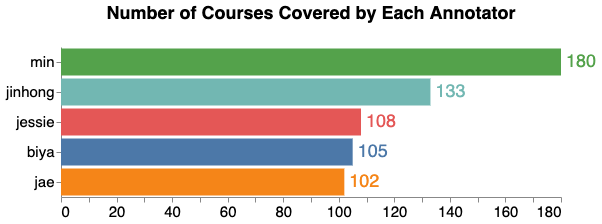

In [12]:
# Plot stats as bar chart
alt.themes.enable('default')

base = alt.Chart(stats_annotated_df_courses, title="Number of Courses Covered by Each Annotator").mark_bar().encode(
    x=alt.X('courses', title=None, stack=False),
    y=alt.Y('annotator', sort='-x', title=None),
    color=alt.Color('annotator', legend=None)
    ).properties(width=500, height=150)

text = base.mark_text(dx=5, size=18, align='left').encode(
    y=alt.Y('annotator', sort='-x'),
    x=alt.X('courses'),
    text=alt.Text('courses')
)

((base + text)
 .configure_axis(labelFontSize=15, titleFontSize=20, grid=False)
 .configure_view(strokeWidth=0)
 .configure_title(fontSize=18, dy=-20, align='center')
)

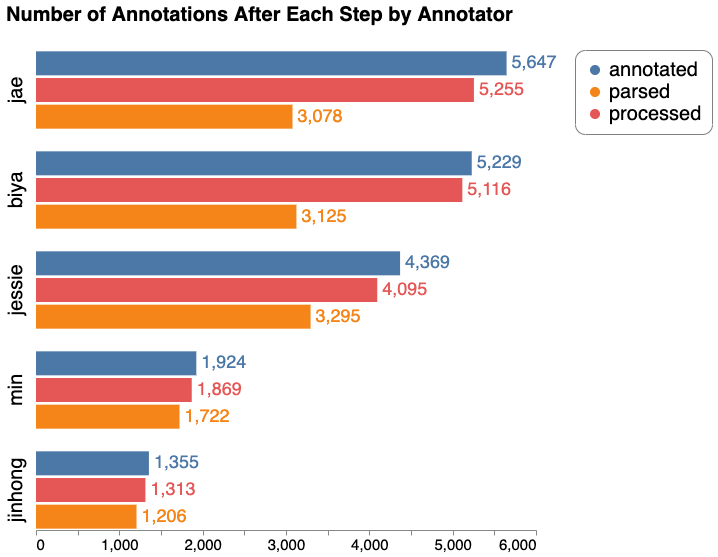

In [13]:
# Plot stats as bar chart
alt.themes.enable('default')

base = alt.Chart(annotation_stats).mark_bar().encode(
    x=alt.X('annotations', stack=False, title=None),
    y=alt.Y('batch', sort=['annotated', 'processed', 'parsed'], title=None, axis=None),
    color=alt.Color('batch', legend=alt.Legend(title=None))
    ).properties(width=500, height=80)

text = base.mark_text(dx=5, size=18, align='left').encode(
    y=alt.Y('batch', sort=['annotated', 'processed', 'parsed']),
    x=alt.X('annotations', stack=False),
    text=alt.Text('annotations', format=',')
)

((base + text).facet(
    title="Number of Annotations After Each Step by Annotator",
    row=alt.Row('annotator', sort= ['jae', 'biya', 'jessie', 'min', 'jinhong'], header=alt.Header(labelFontSize=20), title=None),
).configure_axis(labelFontSize=15, titleFontSize=20, grid=False)
 .configure_view(strokeWidth=0)
 .configure_title(fontSize=20, dy=-20, align='center')
 .configure_legend(
    strokeColor='gray',
    fillColor='#FFFFFF',
    padding=10,
    cornerRadius=10,
    orient='right',
    labelFontSize=20,
    titleFontSize=20
)
)

In [14]:
# Find set of unique courses, for each annotator
courses = {annotator: set(df["course"].value_counts().keys()) for annotator, df in annotations.items()}

In [15]:
# Match agreement partners, slice dataframe for matching courses 
for_agreement = {}

for_agreement["biya"] = annotations["biya"][annotations["biya"].course.isin(list(courses["biya"].intersection(courses["jae"])))]
for_agreement["jae"] = annotations["jae"][annotations["jae"].course.isin(list(courses["biya"].intersection(courses["jae"])))]

for_agreement["jinhong"] = annotations["jinhong"][annotations["jinhong"].course.isin(list(courses["jinhong"].intersection(courses["min"])))]
for_agreement["min"] = annotations["min"][annotations["min"].course.isin(list(courses["jinhong"].intersection(courses["min"])))]

In [16]:
for_agreement["biya"]

,category,author,title,type,collection,year,course
0,Optional,"[{:family=>""Ott"", :given=>""E.""}, {:family=>""Sa...",Coping with Chaos,,,1994,1022
1,Optional,"[{:family=>""Wilks"", :given=>""D.""}]",Statistical Methods in the Atmospheric Sciences,,,1995,1022
2,Optional,"[{:family=>""Wunsch"", :given=>""C.""}]",The Ocean Circulation Inverse Problem,,,1996,1022
3,Optional,"[{:family=>""Kalnay"", :given=>""E.""}]",Atmospheric Modeling,,,2003,1022
4,Required,"[{:family=>""Grassberger"", :given=>""P.""}, {:fam...",Characterization of Strange Attractors,article-journal,Physical Review Letters,1983,1022
...,...,...,...,...,...,...,...
3106,Optional,"[{:family=>""Boville"", :given=>""B.""}, {:family=...",The NCAR Climate System Model,article-journal,J Climate,1998,1013
3107,Optional,"[{:family=>""Solomon"", :given=>""A.""}, {:family=...",Equilibration in an eddy-resolving model with ...,article-journal,J Atmos Sci,2001,1013
3108,Optional,"[{:family=>""Gleckler"", :given=>""P.""}]",Surface energy balance errors in AGCMs: Implic...,article-journal,Geophys Res Lett,2005,1013
3109,Required,"[{:family=>""Pedlosky"", :given=>""Joseph""}]",Waves in the Ocean and Atmosphere Introduction...,,,2003,1007


In [17]:
for_agreement["jae"]

,category,author,title,type,collection,year,course
0,Required,"[{:family=>""Grassberger"", :given=>""P.""}, {:fam...",Characterization of Strange Attractors,article-journal,Physical Review Letters,1983,1022
1,Required,"[{:family=>""Sauer"", :given=>""T.""}, {:family=>""...",Embedology,article-journal,Journal of Statistical Physics,1991,1022
2,Required,"[{:family=>""Ziehmann"", :given=>""C.""}, {:family...",Localized Lyapunov Exponents and the Predictio...,article-journal,Physics Letters A,2000,1022
3,Required,"[{:family=>""Smith"", :given=>""L.A.""}, {:family=...",Uncertainty Dynamics and Predictability in Cha...,article-journal,Quarterly Journal of the Royal Meteorological ...,1999,1022
4,Required,"[{:family=>""Gilmour"", :given=>""I.""}, {:family=...",Linear Regime Duration: Is 24 Hours a Long Tim...,article-journal,Journal of the Atmospheric Sciences,2001,1022
...,...,...,...,...,...,...,...
3052,Optional,"[{:family=>""Boville"", :given=>""B.""}, {:family=...",The NCAR Climate System Model,article-journal,J Climate,1998,1013
3053,Optional,"[{:family=>""Solomon"", :given=>""A.""}, {:family=...",Equilibration in an eddy-resolving model with ...,article-journal,J Atmos Sci,2001,1013
3054,Optional,"[{:family=>""Gleckler"", :given=>""P.""}]",Surface energy balance errors in AGCMs: Implic...,article-journal,Geophys Res Lett,2005,1013
3055,Required,"[{:family=>""Pedlosky"", :given=>""Joseph""}]",Waves in the Ocean and Atmosphere Introduction...,,,2003,1007


In [18]:
for_agreement["jinhong"]

,category,author,title,type,collection,year,course
0,Optional,"[{:family=>""Mara"", :given=>""D.""}]",Domestic Wastewater Treatment in Developing Co...,,,2003,58
1,Optional,"[{:family=>""Viessman"", :given=>""W."", :suffix=>...",Water Supply and Pollution Control,,,2005,58
2,Optional,"[{:family=>""Tchobanoglous"", :given=>""G.""}, {:f...",Wastewater Engineering: Treatment and Reuse,,,2003,58
3,Optional,"[{:family=>""Staff"", :given=>""M.W.H.""}]",Water Treatment: Principles and Design,,,2005,58
4,Required,"[{:family=>""Williams"", :given=>""J.H."", :suffix...",Fundamentals of Applied Dynamics,,,2006,70
...,...,...,...,...,...,...,...
1195,Required,"[{:literal=>""S] = Shah, Devavrat.""}]",Gossip Algorithms,,,2009,7
1196,Optional,"[{:given=>""Battiston""}, {:others=>true}]",DebtRank: Too Central to Fail? Financial Networks,,,2012,7
1197,Optional,"[{:given=>""Akbarpour""}, {:others=>true}]",Just a Few Seeds More: Value of Network Inform...,,,2018,7
1198,Optional,"[{:given=>""Shah""}, {:given=>""Zaman""}]",Rumors in a Network: Who’s the Culprit?,,,2011,7


In [19]:
for_agreement["min"]

,category,author,title,type,collection,year,course
0,Optional,"[{:family=>""Reynolds"", :given=>""T.D.""}, {:fami...",Unit Operations and Processes in Environmental...,,,1996,58
1,Optional,"[{:family=>""Mara"", :given=>""D.""}]",Domestic Wastewater Treatment in Developing Co...,,,2003,58
2,Optional,"[{:family=>""Viessman"", :given=>""W."", :suffix=>...",Water Supply and Pollution Control,,,2005,58
3,Optional,"[{:family=>""Tchobanoglous"", :given=>""G.""}, {:f...",Wastewater Engineering: Treatment and Reuse,,,2003,58
4,Optional,"[{:family=>""Staff"", :given=>""M.W.H.""}]",Water Treatment: Principles and Design,,,2005,58
...,...,...,...,...,...,...,...
1710,Required,"[{:family=>""Spielman"", :given=>""Daniel""}]",Chapter 16: Spectral Graph Theory,book,,2007,7
1711,Optional,"[{:given=>""Battiston""}, {:others=>true}]",DebtRank: Too Central to Fail? Financial Networks,,,2012,7
1712,Optional,"[{:given=>""Akbarpour""}, {:others=>true}]",Just a Few Seeds More: Value of Network Inform...,,,2018,7
1713,Optional,"[{:given=>""Shah""}, {:given=>""Zaman""}]",Rumors in a Network: Who’s the Culprit?,,,2011,7


In [20]:
for annotator, df in annotations.items():
    df.to_csv('annotations_by_' + annotator + '.tsv', sep='\t', index=False)